## Import Modules

In [159]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data


In [160]:
#This is the data for 2014-2017 regular season player stats
#Data taken from basketball-reference.com
location1 = '2014-2017-player-stats.csv'
df1 = pd.read_csv(location1,na_filter=True)

#Some data points are blank, so we filled them with zeros. 
#They are blank because the player did not make any contributions in that category.
df1.fillna(0,inplace=True)

#These are the columns in the dataset
df1.columns =[
    'Rk','Player','Pos','Age','Team','G','GS','MP','FG','FGA',
    'FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA',
    'FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PS/G'
]   
df1.head()

,Rk,Player,Pos,Age,Team,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Taurean Waller-Prince\princta02,SF,22,ATL,59,10,16.6,1.9,4.8,...,0.787,0.4,2.2,2.7,0.9,0.7,0.5,1.0,1.6,5.7
1,2,Thabo Sefolosha\sefolth01,SF,32,ATL,62,42,25.7,2.8,6.4,...,0.733,0.9,3.5,4.4,1.7,1.5,0.5,0.9,1.6,7.2
2,3,Mike Scott\scottmi01,PF,28,ATL,18,0,10.8,0.9,3.3,...,0.875,0.6,1.5,2.1,0.9,0.2,0.2,0.4,0.7,2.5
3,4,Dennis Schroder\schrode01,PG,23,ATL,79,78,31.5,6.9,15.4,...,0.855,0.5,2.6,3.1,6.3,0.9,0.2,3.3,1.9,17.9
4,5,Lamar Patterson\pattela01,SG,25,ATL,5,0,8.0,0.6,3.0,...,0.667,0.2,1.2,1.4,1.2,0.2,0.0,0.8,1.2,1.8


## Determine Training Data

In [161]:
#Getting training data

#These are our features
x_train = np.array(df1[['FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA',
        'FT%','STL','MP','TOV','ORB','DRB','BLK','PF']])

#These are our target variables
y_train = np.array(df1[['PS/G','AST','TRB']])


## Train Linear Regeression Model
Train regression model using 2014-2017 data and make predictions of 2017-2018 data.

In [162]:
from sklearn import linear_model

# Create linear regression object for player stats
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
ytrain_pred = regr.predict(x_train)
RSS_train = np.mean((y_train - ytrain_pred)**2)/np.mean((y_train-np.mean(y_train))**2)
print("Residual sum of squares for training data: %.4f" %RSS_train)

#Load test dataset from 2017-2018 regular season player stats
location2 = '2017-2018.csv'
df2 = pd.read_csv(location2,na_filter=True)
df2.fillna(0,inplace=True)
df2.columns = [
    'Rk','Player','Pos','Age','Team','G','GS','MP','FG','FGA',
    'FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA',
    'FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PS/G'
]   
df2.head()

#Divide test data into test features and expectations
x_test = np.array(df2[['FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA',
        'FT%','STL','MP','TOV','ORB','DRB','BLK','PF']])
y_test = np.array(df2[['PS/G','AST','TRB']])

#Predict the Points per Game, Assists, and Total Rebounds for all players
y_testpred = regr.predict(x_test)
dfpred = pd.DataFrame(y_testpred,columns = ['Predicted PPG','Predicted AST','Predicted TRB'])
df2 = pd.concat([df2,dfpred],axis=1)

#Get Residual Sum of Squares
RSS_test = np.mean((y_test - y_testpred)**2)/np.mean((y_test-np.mean(y_test))**2)
print("Residual sum of squares for test data: %.4f" %RSS_test)

df2.head()


Residual sum of squares for training data: 0.0096
Residual sum of squares for test data: 0.0097


,Rk,Player,Pos,Age,Team,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PS/G,Predicted PPG,Predicted AST,Predicted TRB
0,1,Andrew White\whitean01,SF,24,ATL,15,0,13.9,1.7,4.9,...,2.3,0.4,0.2,0.1,0.5,0.8,4.6,4.698901,0.702484,2.295556
1,2,Taurean Waller-Prince\princta02,SF,23,ATL,82,82,30.0,5.1,11.9,...,4.7,2.6,1.0,0.5,2.3,2.0,14.1,14.156105,4.306447,4.685209
2,3,Isaiah Taylor\taylois01,PG,23,ATL,67,9,17.4,2.4,5.8,...,1.4,3.1,0.5,0.1,1.3,1.7,6.6,6.600353,2.344252,1.400912
3,4,Dennis Schroder\schrode01,PG,24,ATL,67,67,31.0,7.5,17.1,...,3.1,6.2,1.1,0.1,2.7,2.2,19.4,19.490180,5.028770,3.096229
4,5,Miles Plumlee\plumlmi01,C,29,ATL,55,35,16.7,1.9,3.3,...,4.1,0.8,0.3,0.5,1.1,1.4,4.3,4.296055,1.603655,4.095405


In [163]:
#Load team playoffs stats for training
location3 = '2018-team-playoffs-stats.csv'
df3 = pd.read_csv(location3,na_filter=True)
df3.fillna(0,inplace=True)
df3.columns = [
                'Rk','Team','G','MP','FG','FGA',
                'FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA',
                'FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'] 
df3.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Boston Celtics,19,242.6,36.4,83.3,0.437,10.5,30.6,0.343,...,0.767,8.8,32.8,41.7,21.2,6.8,4.1,11.6,20.4,101.4
1,2,Cleveland Cavaliers,22,242.3,36.9,81.9,0.450,10.0,30.3,0.331,...,0.752,9.8,31.6,41.4,19.2,6.0,4.4,12.7,19.5,101.1
2,3,Golden State Warriors,21,241.2,41.2,86.0,0.480,11.2,31.4,0.357,...,0.822,9.1,35.9,45.0,26.0,7.9,5.8,12.9,19.7,110.4
3,4,Houston Rockets,17,240.0,37.2,85.3,0.436,13.4,39.8,0.337,...,0.772,8.8,34.2,43.0,18.8,8.1,5.5,12.1,19.1,104.9
4,5,Indiana Pacers,7,240.0,38.6,80.1,0.481,9.7,27.1,0.358,...,0.711,8.1,31.9,40.0,21.1,8.1,2.7,13.1,21.9,100.6


In [164]:
#Dictionary for renaming abbreviations into full name.
teamDict = {
    'ATL': 'Atlanta Hawks',
    'BOS': 'Boston Celtics',
    'BRK': 'Brooklyn Nets',  
    'CHO': 'Charlotte Hornets',
    'CHI': 'Chicago Bulls',
    'CLE': 'Cleveland Cavaliers',
    'DAL': 'Dallas Mavericks',
    'DEN': 'Denver Nuggets',
    'DET': 'Detroit Pistons',
    'GSW': 'Golden State Warriors',
    'HOU': 'Houston Rockets',
    'IND': 'Indiana Pacers',
    'LAC': 'Los Angeles Clippers',
    'LAL': 'Los Angeles Lakers',
    'MEM': 'Memphis Grizzlies',
    'MIA': 'Miami Heat',
    'MIL': 'Milwaukee Bucks',
    'MIN': 'Minnesota Timberwolves',
    'NOP': 'New Orleans Pelicans',
    'NYK': 'New York Knicks',
    'OKC': 'Oklahoma City Thunder',
    'ORL': 'Orlando Magic',
    'PHI': 'Philadelphia 76ers',
    'PHO': 'Phoenix Suns',
    'POR': 'Portland Trail Blazers',
    'SAC': 'Sacramento Kings',
    'SAS': 'San Antonio Spurs',
    'TOR': 'Toronto Raptors',
    'TOT': 'Traded Player',
    'UTA': 'Utah Jazz',
    'WAS': 'Washington Wizards'    
}

#Change team abbreviations in 2017-2018 regular season player stats to full name
df2['Team'].replace(teamDict,inplace=True)
df2.head()

,Rk,Player,Pos,Age,Team,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PS/G,Predicted PPG,Predicted AST,Predicted TRB
0,1,Andrew White\whitean01,SF,24,Atlanta Hawks,15,0,13.9,1.7,4.9,...,2.3,0.4,0.2,0.1,0.5,0.8,4.6,4.698901,0.702484,2.295556
1,2,Taurean Waller-Prince\princta02,SF,23,Atlanta Hawks,82,82,30.0,5.1,11.9,...,4.7,2.6,1.0,0.5,2.3,2.0,14.1,14.156105,4.306447,4.685209
2,3,Isaiah Taylor\taylois01,PG,23,Atlanta Hawks,67,9,17.4,2.4,5.8,...,1.4,3.1,0.5,0.1,1.3,1.7,6.6,6.600353,2.344252,1.400912
3,4,Dennis Schroder\schrode01,PG,24,Atlanta Hawks,67,67,31.0,7.5,17.1,...,3.1,6.2,1.1,0.1,2.7,2.2,19.4,19.490180,5.028770,3.096229
4,5,Miles Plumlee\plumlmi01,C,29,Atlanta Hawks,55,35,16.7,1.9,3.3,...,4.1,0.8,0.3,0.5,1.1,1.4,4.3,4.296055,1.603655,4.095405


In [165]:
#Dataset for players in the playoffs in 2018
location4 = 'Players-in-2018-playoffs.csv'
df4 = pd.read_csv(location4,na_filter=True)
df4.fillna(0,inplace=True)
df4.columns = [
                'Rk','Player','Pos','Age','Team','G','GS','MP','FG','FGA',
                'FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA',
                'FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PS/G'
] 
df4['Team'].replace(teamDict,inplace=True)
df4.head()


,Rk,Player,Pos,Age,Team,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Guerschon Yabusele\yabusgu01,PF,22,Boston Celtics,12,0,48,1,9,...,0.400,3,8,11,3,2,0,0,9,4
1,2,Jayson Tatum\tatumja01,SF,19,Boston Celtics,19,19,683,123,261,...,0.845,10,73,83,52,23,10,41,50,351
2,3,Marcus Smart\smartma01,SG,23,Boston Celtics,15,4,449,48,143,...,0.735,14,42,56,80,26,10,36,44,147
3,4,Terry Rozier\roziete01,PG,23,Boston Celtics,19,19,696,108,266,...,0.821,8,92,100,109,24,6,22,38,313
4,5,Semi Ojeleye\ojelese01,PF,23,Boston Celtics,17,3,230,10,33,...,0.857,4,24,28,2,3,0,2,21,32


In [166]:
#Get seasonal stats for players in the 2018 playoffs
players = np.array(df4['Player'])
dfSeaPred = df2.loc[df2['Player'].isin(players)]
dfSeaPred.head()


,Rk,Player,Pos,Age,Team,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PS/G,Predicted PPG,Predicted AST,Predicted TRB
18,19,Guerschon Yabusele\yabusgu01,PF,22,Boston Celtics,33,4,7.1,0.8,1.8,...,1.6,0.5,0.1,0.2,0.4,0.7,2.4,2.476490,0.089892,1.590289
20,21,Jayson Tatum\tatumja01,SF,19,Boston Celtics,80,80,30.5,5.0,10.4,...,5.0,1.6,1.0,0.7,1.4,2.1,13.9,13.985331,2.839678,4.996325
21,22,Marcus Smart\smartma01,SG,23,Boston Celtics,54,11,29.9,3.5,9.5,...,3.5,4.8,1.3,0.4,2.4,2.5,10.2,10.202158,4.592218,3.496259
23,24,Terry Rozier\roziete01,PG,23,Boston Celtics,80,16,25.9,4.0,10.0,...,4.7,2.9,1.0,0.2,1.0,1.5,11.3,11.274233,1.837255,4.690737
24,25,Semi Ojeleye\ojelese01,PF,23,Boston Celtics,73,0,15.8,0.9,2.6,...,2.2,0.3,0.3,0.1,0.3,1.2,2.7,2.571482,0.408144,2.192816


In [167]:
playoffTeams = dfSeaPred.Team.unique()
teamStats = []

#This loop is for predicting the overall team stats for PPG, AST, and TRB
for i in playoffTeams:
    sepTeam = dfSeaPred.loc[dfSeaPred['Team'].isin([i])]
    teamPPG = sepTeam['Predicted PPG'].sum(axis=0) 
    teamAST = sepTeam['Predicted AST'].sum(axis=0)
    teamTRB = sepTeam['Predicted TRB'].sum(axis=0)
    teamStats.append([teamPPG, teamAST, teamTRB])

teamStats = pd.DataFrame(teamStats,columns=['Predicted PPG',
                                            'Predicted AST',
                                            'Predicted TRB'])
playoffScores = np.array(df3['PTS'])
print(teamStats) 

    Predicted PPG  Predicted AST  Predicted TRB
0      105.007321      23.352455      49.919510
1      138.384975      25.324320      53.208154
2      143.025955      32.617204      53.309624
3      157.409114      32.754727      63.334602
4      120.327126      26.510814      48.856311
5      125.741786      25.801648      54.241190
6      139.675572      30.361490      52.856609
7      127.941623      25.667965      45.849100
8      118.814987      23.212013      47.526361
9      113.776322      21.210058      46.648062
10     146.498388      31.482889      61.723520
11     122.394298      23.860087      51.429488
12     118.133596      24.796045      51.120322
13     121.754537      20.995592      48.150351
14     118.304226      26.594655      50.357686
15     115.630645      27.434746      46.148277


                      Team  Actual Average Score  Predicted Average Score
0           Boston Celtics                 101.4               101.758620
1      Cleveland Cavaliers                 101.1               104.636596
2    Golden State Warriors                 110.4               106.273070
3          Houston Rockets                 104.9               106.104655
4           Indiana Pacers                 100.6               103.844485
5               Miami Heat                 103.4               103.411679
6          Milwaukee Bucks                 101.9               105.655731
7   Minnesota Timberwolves                 101.6               104.845624
8     New Orleans Pelicans                 110.0               103.349910
9    Oklahoma City Thunder                 101.2               102.685347
10      Philadelphia 76ers                 108.8               105.138399
11  Portland Trail Blazers                 105.5               103.200641
12       San Antonio Spurs            

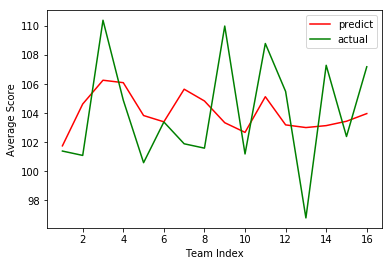

Residual sum of squares for test data: 0.8886
Actual Team that won the Playoff:  Golden State Warriors
Predicted Team that won the Playoff:  Golden State Warriors


In [169]:
# Create linear regression object for playoffs
regrFinals = linear_model.LinearRegression()
regrFinals.fit(teamStats,playoffScores)
finalsScore_pred = regrFinals.predict(teamStats)

#Chart of predicted and actual average playoff scores
teams = pd.DataFrame(df3.Team,columns=['Team'])
playoffScoresDF = pd.DataFrame(playoffScores,columns = ['Actual Average Score'])
finalsScore_predDF = pd.DataFrame(finalsScore_pred,columns = ['Predicted Average Score'])

#Get error percentage
err = (np.abs(playoffScores - finalsScore_pred)/playoffScores)*100
errDF = pd.DataFrame(err,columns=['Error Percentage'])

#Print out error percentage and average playoff scores
FinalsDF = pd.concat([teams,playoffScoresDF,finalsScore_predDF],axis=1)
errDF = pd.concat([teams,errDF],axis=1)
print(FinalsDF)
print(errDF)

#Plot the predicted and actual average scores for each play off teams
x = np.linspace(1,16,16)
plt.plot(x,finalsScore_pred,'r-')
plt.plot(x,playoffScores,'g-')
plt.xlabel('Team Index')
plt.ylabel('Average Score')
plt.legend(['predict','actual'])
plt.show()

RSS_testFinals = np.mean((playoffScores - finalsScore_pred)**2)/np.mean((playoffScores-np.mean(playoffScores))**2)
print("Residual sum of squares for test data: %.4f" %RSS_testFinals)

print('Actual Team that won the Playoff: ',teams.Team[np.argmax(playoffScores)])
print('Predicted Team that won the Playoff: ',teams.Team[np.argmax(finalsScore_pred)])